In [52]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Generating synthetic data along with their outcome

In [53]:
def gen_data(n, h, sd_1, sd_2):
   x_1 = ss.norm.rvs(h, sd_1, n)
   y_1 = ss.norm.rvs(0, sd_1, n)    # outcome
   x_2 = ss.norm.rvs(-h, sd_2, n)
   y_2 = ss.norm.rvs(0, sd_2, n)    # outcome
   return (x_1, y_1, x_2, y_2)

In [54]:
def plot_data(x_1, y_1, x_2, y_2):  # just for some visualisation
    plt.plot(x_1, y_1, 'o', ms=2)
    plt.plot(x_2, y_2, 'o', ms=2)

In [55]:
x_1, y_1, x_2, y_2 = gen_data(1000,2 , 2.5, 1)

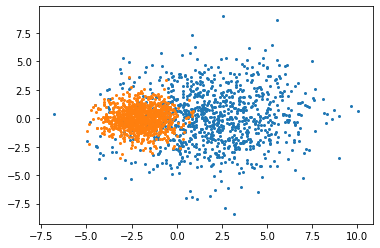

In [56]:
plot_data(x_1, y_1, x_2, y_2)

### Performing Logistic Regression on the above synthetic data

In [57]:
clf = LogisticRegression()

In [58]:
X = np.vstack((np.vstack((x_1, y_1)).T, np.vstack((x_2, y_2)).T))
X.shape

(2000, 2)

In [42]:
y = np.hstack((np.repeat(1,1000), np.repeat(2,1000)))
y.shape

(2000,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [62]:
y_train.shape

(1000,)

In [63]:
clf.fit(X_train, y_train)      # .fit() is for training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
clf.score(X_test, y_test)   # to check accuracy

0.894

In [65]:
clf.predict_proba(np.array([-2, 0]).reshape(1,-1))  # probability of belongingness to a class

array([[0.1485766, 0.8514234]])

In [66]:
clf.predict(np.array([-2,0]).reshape(1,-1))     # where do u belong

array([2])

### Computing predictive probabilities across the grid

In [67]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")


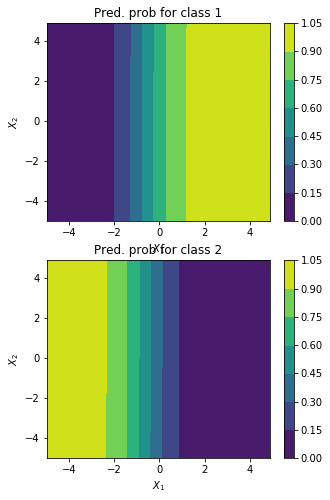

In [68]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");